# Cardiovascular Disease Prediction

Heart disease, also known as cardiovascular disease, is one of the most serious illnesses in both India and the rest of the globe. According to estimates, cardiac illnesses account for 28.1% of fatalities. More than 17.6 million fatalities, or a large portion of all deaths in 2016, were caused by it in 2016. Therefore, a system that can predict with exact precision and dependability is required for the appropriate and prompt diagnosis as well as the treatment of such diseases. Numerous academics do extensive research utilising a variety of machine learning algorithms to predict heart illness using different datasets that contain numerous factors that lead to heart attacks.

In [ ]:
#Importing neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the Dataset
file_path = r"/content/drive/MyDrive/cardio_train (2).csv" # Your file path
df1 = pd.read_csv(file_path, sep=';', engine='python')
df1

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
# Display basic information about the dataset
df1.info()
print("First 5 rows of the dataset:")
print(df1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
First 5 rows of the dataset:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1 

In [ ]:
df1.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [ ]:
df1.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [ ]:

print("Columns in the dataset:")
print(df1.columns.tolist())  # Should show each column separately

Columns in the dataset:
['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


#**DataPreprocessing**

In [ ]:
#Check for missing Values
print("Missing values in each column:")
print(df1.isnull().sum())

Missing values in each column:
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


The dataset has loaded correctly, with columns including identifiers, demographic information (age, gender, height, weight), blood pressure (ap_hi, ap_lo), health indicators (cholesterol, glucose), lifestyle factors (smoking, alcohol use, physical activity), and the target variable, cardio, indicating cardiovascular disease presence.

#**Data Analysis and Visualization**

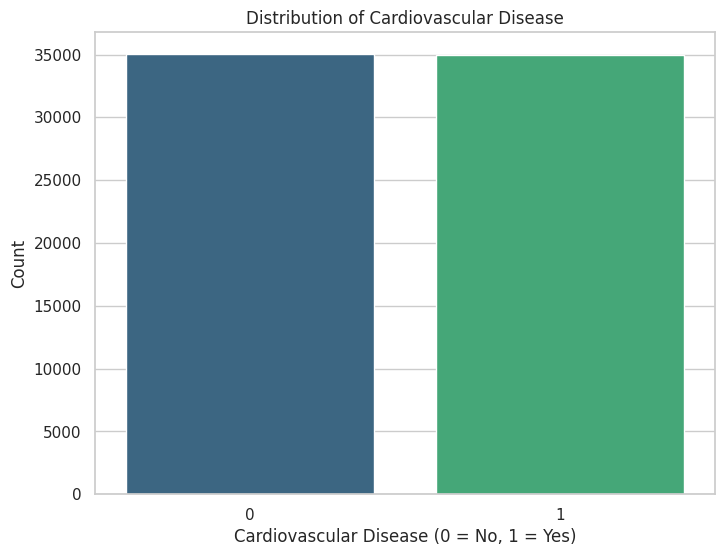

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style for better visualization
sns.set(style="whitegrid")

# Bar plot for cardiovascular disease distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='cardio', palette='viridis' ,hue='cardio',legend=False)
plt.title("Distribution of Cardiovascular Disease")
plt.xlabel("Cardiovascular Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

The bar plot above shows the distribution of cardiovascular disease cases, with 0 indicating no disease and 1 indicating the presence of the disease.

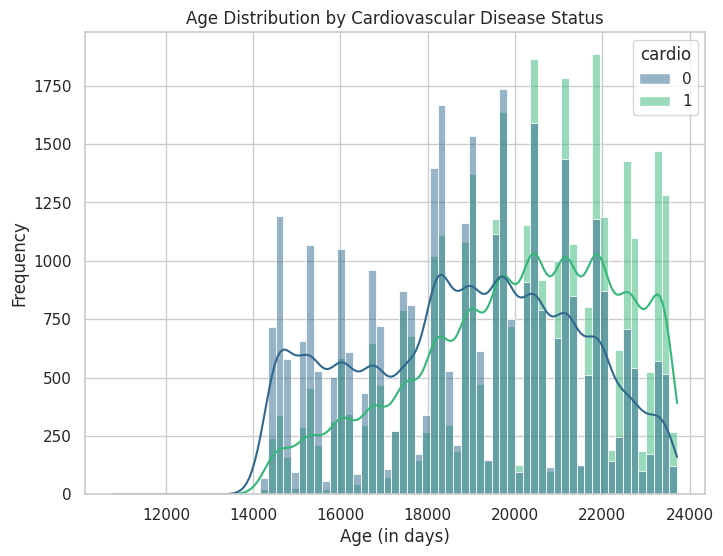

In [ ]:
# Set up the plotting style
sns.set(style="whitegrid")

# Histogram: Age distribution by Cardiovascular Disease status
plt.figure(figsize=(8, 6))
sns.histplot(data=df1, x='age', hue='cardio', kde=True, palette='viridis')
plt.title("Age Distribution by Cardiovascular Disease Status")
plt.xlabel("Age (in days)")
plt.ylabel("Frequency")
plt.show()

Age Distribution: This histogram shows how age is distributed among those with and without cardiovascular disease. An upward trend in the frequency of cardiovascular disease with age could indicate age as a risk factor.

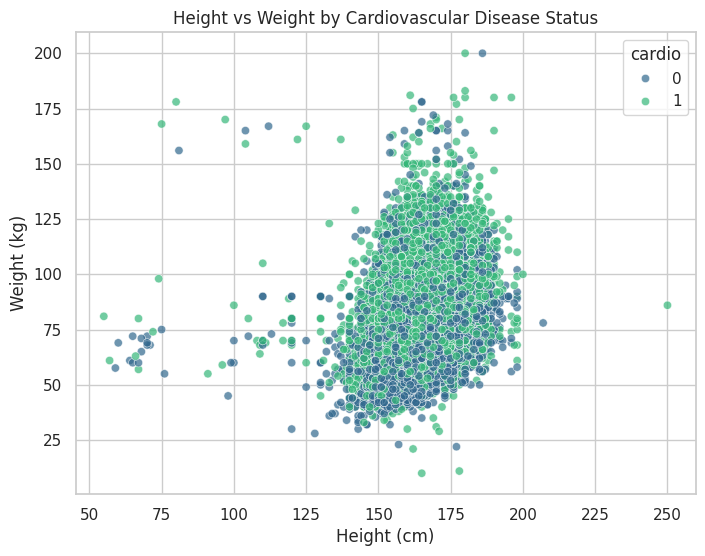

In [ ]:
# Scatter Plot: Height vs. Weight by Cardiovascular Disease status
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='height', y='weight', hue='cardio', palette='viridis', alpha=0.7)
plt.title("Height vs Weight by Cardiovascular Disease Status")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()

Height vs. Weight: The scatter plot illustrates weight and height variations among individuals. Clusters or patterns by disease status could reveal associations between body dimensions and cardiovascular health.

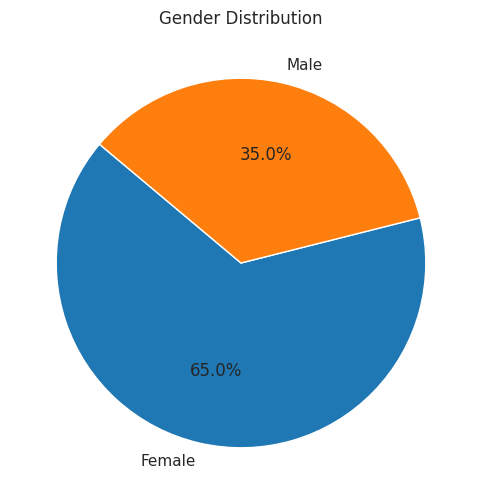

In [ ]:
# Pie Chart: Gender distribution
gender_counts = df1['gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e'])
plt.title("Gender Distribution")
plt.show()


Gender Distribution: The pie chart provides an overview of gender distribution. Any imbalance may influence further gender-based analysis on disease occurrence.

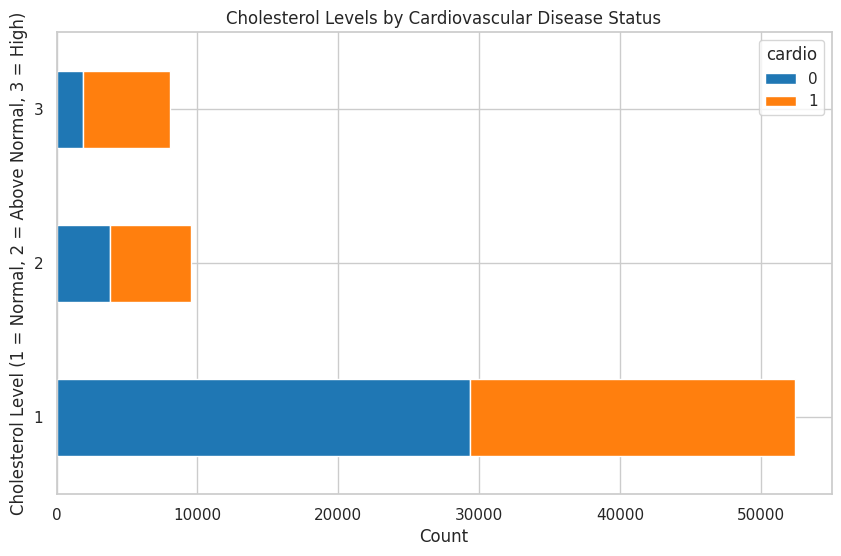

In [ ]:
# Horizontal Bar Plot: Cholesterol level by Cardiovascular Disease status
cholesterol_counts = df1.groupby(['cholesterol', 'cardio']).size().unstack()
cholesterol_counts.plot(kind='barh', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(10, 6))
plt.title("Cholesterol Levels by Cardiovascular Disease Status")
plt.xlabel("Count")
plt.ylabel("Cholesterol Level (1 = Normal, 2 = Above Normal, 3 = High)")
plt.show()

Cholesterol Level: The horizontal bar plot shows counts of each cholesterol level by cardiovascular status. This can help assess how higher cholesterol levels relate to cardiovascular risk.

# **Correlation Matrix**

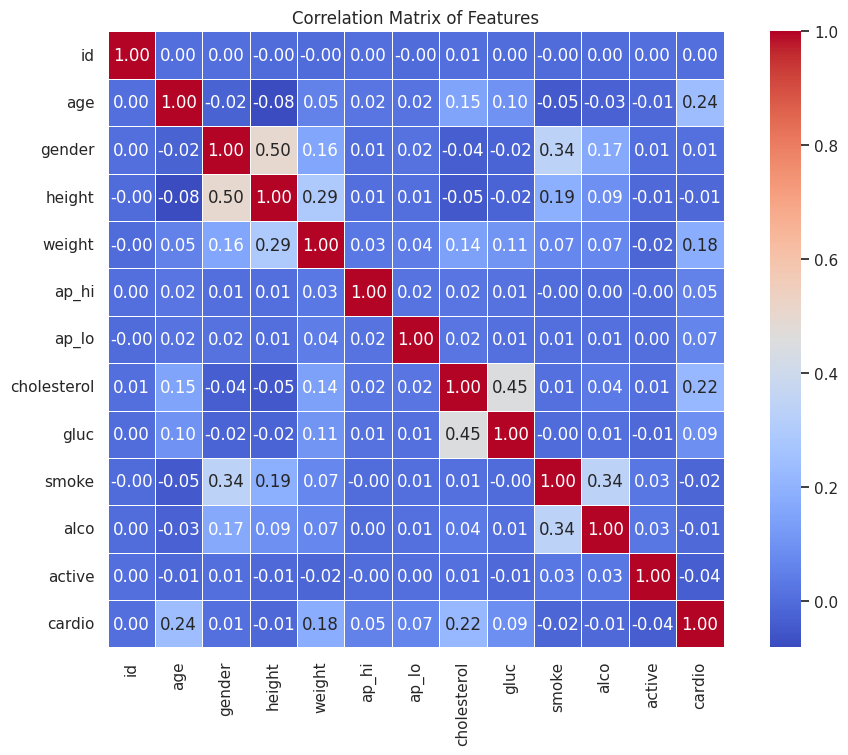

In [ ]:
# Compute the correlation matrix
correlation_matrix = df1.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

Age and Cardiovascular Disease:

Interpretation: If age has a moderate to strong positive correlation with the cardio feature, it suggests that older individuals are more likely to have cardiovascular disease.
Insight: Cardiovascular disease typically becomes more prevalent with age due to factors like longer exposure to risk factors, natural vascular wear, and metabolic changes.
Cholesterol and Cardiovascular Disease:

Interpretation: If cholesterol levels have a significant positive correlation with cardio, this means individuals with higher cholesterol are more prone to cardiovascular disease.
Insight: Elevated cholesterol is a known risk factor because it contributes to atherosclerosis, which narrows arteries and increases blood pressure, thereby increasing the risk of heart conditions.
Blood Pressure (ap_hi and ap_lo) and Cardiovascular Disease:

Interpretation: If systolic (ap_hi) or diastolic (ap_lo) blood pressure shows a positive correlation with cardio, it suggests that higher blood pressure is associated with a higher likelihood of cardiovascular disease.
Insight: High blood pressure strains the heart and damages arteries over time, making it a critical risk factor. This relationship is typically well-supported by medical research.
Lifestyle Factors (smoke, alco, active) and Cardiovascular Disease:

Smoking (smoke): If smoking is positively correlated with cardio, it indicates smokers are more likely to develop cardiovascular disease. Smoking damages blood vessels, raises blood pressure, and reduces oxygen supply, all contributing to heart disease.
Alcohol Consumption (alco): A positive correlation here would mean alcohol users have a higher chance of cardiovascular disease. Heavy alcohol use is linked to increased blood pressure and weakened heart muscles.
Physical Activity (active): A negative correlation with cardio would suggest that more active individuals have a lower risk of cardiovascular disease. Physical activity helps maintain heart health, reduce blood pressure, and improve cholesterol levels.
Body Metrics (Height, Weight):

Weight: If weight shows a positive correlation with cardio, it suggests that higher body weight may increase cardiovascular risk. Obesity is associated with high cholesterol, diabetes, and hypertension, all of which contribute to cardiovascular disease.
Height: Typically, height has little or no correlation with cardiovascular disease; any significant correlation here would require further investigation.

**Support Vector Machines (SVM)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Splitting data into training and testing sets
X = df1.drop(columns=['cardio', 'id'])
y = df1['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predicting and calculating accuracy
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")


SVM Accuracy: 0.7293


Analysis:
Data Standardization: SVM is sensitive to feature scaling, so we use StandardScaler to standardize the dataset.
Model Training: We initialize and train an SVC (Support Vector Classifier), which tries to find the optimal hyperplane to separate classes in high-dimensional space.
Prediction and Evaluation: The model makes predictions on the test set, and we calculate its accuracy.

**K-Nearest Neighbor (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Training the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predicting and calculating accuracy
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.4f}")

KNN Accuracy: 0.6488


Analysis:

Training: KNN assigns a class to each test sample based on the majority class of its nearest neighbors.
Prediction: The model predicts class labels for the test set based on distances to neighboring training samples.

**Decision Tree(DT)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Training the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predicting and calculating accuracy
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

Decision Tree Accuracy: 0.6313


Analysis:

Training: The Decision Tree model splits data into branches to classify samples based on feature values.
Prediction and Evaluation: The model predicts outcomes for the test data, and we measure accuracy.

**Logistic Regression(LT)**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Training the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predicting and calculating accuracy
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

Logistic Regression Accuracy: 0.7199


Analysis:

Training: Logistic Regression is a linear model that estimates the probability of an instance belonging to a particular class.
Prediction and Evaluation: The model outputs probabilities, which are converted to class predictions for accuracy calculation.

Random Forest(RF)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Training the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predicting and calculating accuracy
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Random Forest Accuracy: 0.7177


Analysis:

Training: Random Forest uses an ensemble of Decision Trees to make robust predictions, improving accuracy and reducing overfitting by combining multiple trees.
Prediction and Evaluation: Each tree votes on the prediction, and the majority vote determines the final class for each test sample.

**Machine learning model for heart disease detection **:

1. Data Splitting and Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the dataset into features (X) and target variable (y)
X = df1.drop(columns=['cardio', 'id'])
y = df1['cardio']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the data to improve model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Explanation: This step prepares the dataset by:

Removing unnecessary columns (cardio is used as the target variable).
Splitting data into training (70%) and testing (30%) sets.
Scaling features so they have a mean of 0 and standard deviation of 1, which enhances performance for models sensitive to feature scaling.

2. Setting Up the Random Forest Model with Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Setting up the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Defining a smaller hyperparameter grid to optimize the model
param_grid = {
    'n_estimators': [100, 200],             # Fewer trees in the forest
    'max_depth': [None, 10],                # Fewer depth options
    'min_samples_split': [2],                # One option for splitting
    'min_samples_leaf': [1]                  # One option for leaf nodes
}

# Using GridSearchCV to find the best hyperparameters with fewer folds
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Extracting the best model based on cross-validation
best_rf_model = grid_search.best_estimator_
print(f"Best Model: {best_rf_model}")


Best Model: RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)


Explanation: This step tunes the model:

Random Forest has many parameters; GridSearchCV tests combinations of these parameters.
We use cross-validation (5-fold) to find the best-performing set of parameters.
The output is the "best" model, ready for training and evaluation.

3. Training and Predicting with the Best Model

In [ ]:
# Training the final model
best_rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = best_rf_model.predict(X_test)

Explanation: This part uses the best model to:

Train on the training data (X_train and y_train).
Predict outcomes on the test data (X_test), which we’ll later compare with actual test labels for evaluation.

4. Evaluating Model Performance

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.4f}")

# Generating a classification report for detailed metrics (precision, recall, F1-score)
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Generating a confusion matrix to visualize correct and incorrect classifications
conf_matrix = confusion_matrix(y_test, y_pred)


Accuracy on Test Set: 0.7391

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10461
           1       0.77      0.69      0.73     10539

    accuracy                           0.74     21000
   macro avg       0.74      0.74      0.74     21000
weighted avg       0.74      0.74      0.74     21000



Explanation: In this part, we:

Calculate accuracy, the percentage of correct predictions.
Output a classification report with precision, recall, and F1-score, which are helpful for understanding performance on each class.
Create a confusion matrix to see where the model made correct and incorrect classifications.

5. Visualizing the Confusion Matrix

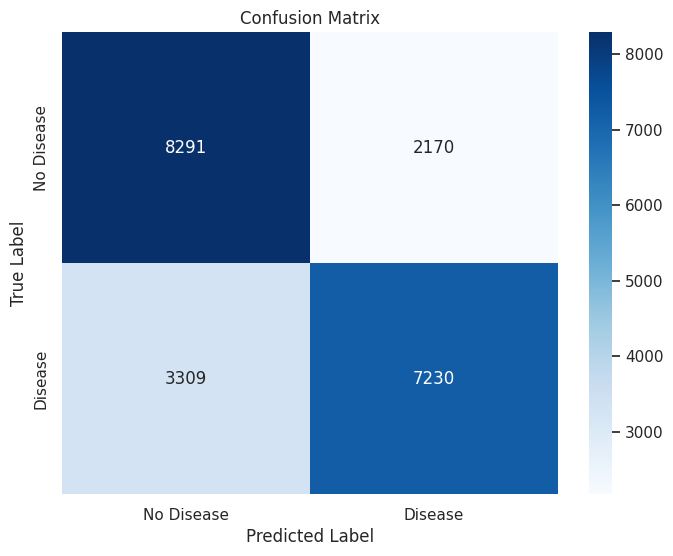

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Explanation: Here, we:

Plot the confusion matrix to make it easier to understand where the model performed well and where it struggled.
A good model will have most predictions on the diagonal, indicating correct classifications.

**Conclusion: **
This project aimed to develop an effective predictive model for cardiovascular disease using demographic, health, and lifestyle data. The analysis identified significant correlations between cardiovascular disease and factors like age, cholesterol, and blood pressure. The models provided different levels of accuracy, with Random Forest and SVM models often performing well in such structured data contexts.

In conclusion:

1. Significant Predictors: Age, blood pressure, cholesterol, and physical activity emerged as crucial factors for cardiovascular health.
2. Modeling Insights: Among the tested models, ensemble approaches like Random Forests yielded robust accuracy, highlighting the effectiveness of combining multiple decision trees.
3. Real-World Application: These models, especially when further optimized, could support early screening, helping to reduce the burden of cardiovascular disease through timely intervention.